### Why convolutions can't colour
- Consider the following periodic signal, where $x_u = \min (1-u, 1+u)$ for $u \in [-1,1]$ and $x_{u+2} = x_u$
- Suppose that the true segmentation for each region is $[-1,1] + 2k, k \in \mathbb{Z}$ for region $k$.

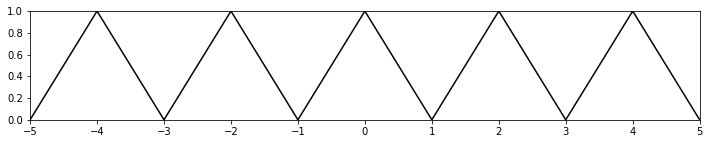

In [271]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
u = np.linspace(-1,1,100)
x = np.minimum(1-u, 1+u)
shifts = np.arange(-6,8,2)
plt.figure(figsize=(12,2))
U = np.concatenate([u+i for i in shifts])
X = np.tile(x,[len(shifts)])
plt.plot(U, X, 'k')
plt.xticks(np.arange(-7,7.1));
plt.xlim([-5,5])
plt.ylim([0,1]);

- Let us consider each of the peaks as an instance.
- A successful colouring based algorithm should assign values to points in each peak in such a way as to allow us to distinguish between each peak
- The peaks are centred on the set of even numbers $2k, k \in \mathbb{Z}$.
- So if we could assign each peak to values in the range $2k \pm 1$ and round the values to the nearest even number we would get a different label for each peak.


(-4, 4)

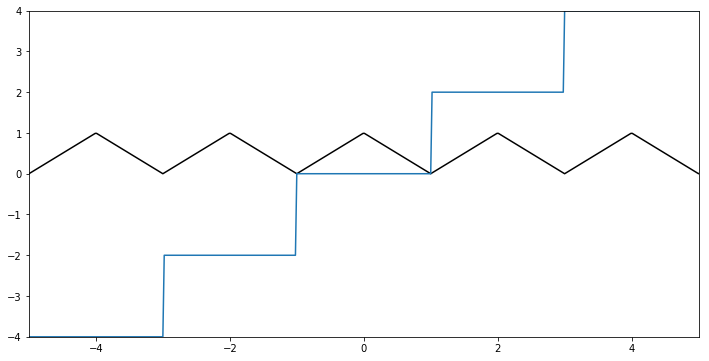

In [150]:
def round_to_even(x):
    return np.round(x/2)*2 
plt.figure(figsize=(12,6))
plt.plot(U, X, 'k')
plt.plot(U, round_to_even(U))
plt.xlim([-5,5])
plt.ylim([-4,4])

- Consider the selection of filters below

(-1, 1)

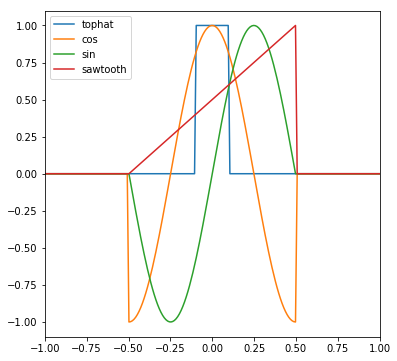

In [260]:
z = np.linspace(-0.5, 0.5, 100)

filters = {
    'tophat': np.ones(20),
    'cos': np.cos(2*np.pi*z) ,
    'sin': np.sin(2*np.pi*z) ,
    'sawtooth': (z+0.5)
}

filters = {k:np.pad(v, [100-len(v)//2, 100-len(v)//2], mode='constant') for k,v in filters.items()}

plt.figure(figsize=(6,6))
for name, filt in filters.items():
    plt.plot(np.linspace(-1,1,200), filt, label=name)

plt.legend();
plt.xlim([-1,1])


- All of the above filters assign values to the points of peak for $u \in [-1,1]$ in the range $2k \pm 1$ for $k=0$ i.e. in the range $\pm1$
- We assume an infinitely repeating signal so we extend x in both directions before convolving to avoid boundary effects.
- The left-hand plot shows the convolved signal.
- The right-hand plot shows it rounded to the nearest even number i.e. $0$.

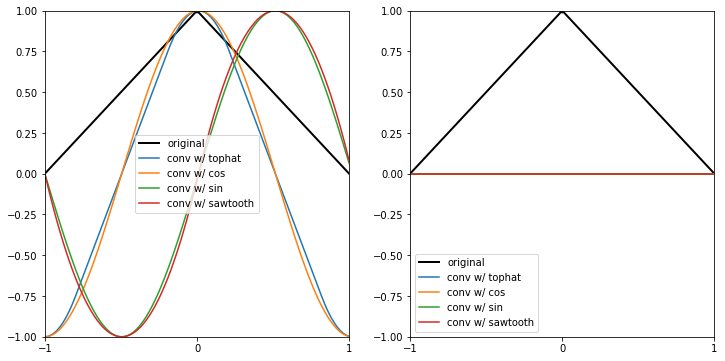

In [262]:
x_extended = np.tile(x,[3])
plt.figure(figsize=(12,6))
for i in range(1,3):
    plt.subplot(1,2,i)
    plt.plot(u, x, label ='original', linewidth=2, color='k')
    for name, filt in filters.items():
        conv = np.convolve(x_extended, filt, 'same')[len(u):-len(u)]
        conv = 2*(conv-np.min(conv))/(np.max(conv) - np.min(conv)) - 1
        if i == 2:
            conv = round_to_even(conv)
        plt.plot(u, conv,  label='conv w/ %s'%name)
    plt.legend();
    plt.xticks(np.arange(-1,1.1));
    plt.xlim([-1,1])
    plt.ylim([-1,1])

- However if we now look at the convolution of these filters with the repeated signal we see that each region will be 'segmented' the way.

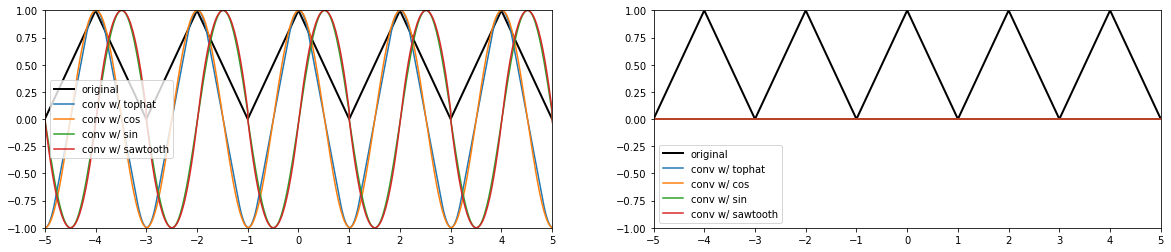

In [263]:
X_extended = np.tile(x,[len(shifts)+2])
plt.figure(figsize=(20,4))
for i in range(1,3):
    plt.subplot(1,2,i)
    plt.plot(U, X, label ='original', linewidth=2, color='k')
    for name, filt in filters.items():
        conv = np.convolve(X_extended, filt, 'same')[len(u):-len(u)]
        conv = 2*(conv-np.min(conv))/(np.max(conv) - np.min(conv)) - 1
        if i == 2:
            conv = round_to_even(conv)
        plt.plot(U, conv,  label='conv w/ %s'%name)
    plt.legend();
    plt.xticks(np.arange(-5,5.1));
    plt.xlim([-5,5])
    plt.ylim([-1,1])

- This is also the case for any location invariant function for example $x_u*(1 - x_u)$

(-7, 7)

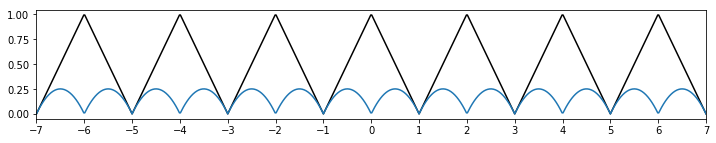

In [246]:
plt.figure(figsize=(12,2))
plt.plot(U, X,'k')
plt.plot(U, X*(1-X))
plt.xticks(np.arange(-7,7.1));
plt.xlim([-7,7])

- In contrast segmentation models like MaskRCNN which provide a segmentation for a candidate region from the image are not location invariant.
- Even if the same values are assigned to two different patches since we know where the patches come from in the image so we can distinguish the objects.
- However by incorporating location information we can obtain different values for each region. 

(-7, 7)

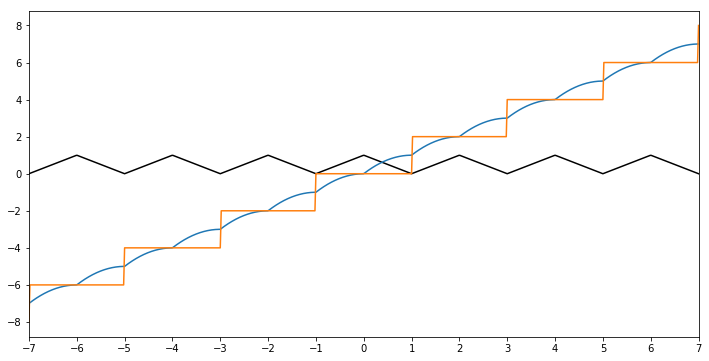

In [256]:
plt.figure(figsize=(12,6))
plt.plot(U, X, 'k')
plt.plot(U, U + X*(1-X))
plt.plot(U, round_to_even(U + X*(1-X)))
plt.xticks(np.arange(-7,7.1));
plt.xlim([-7,7])